# ABSTRACT


In [1]:
import pandas as pd

train_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/train.csv"
train = pd.read_csv(train_url)

# DATA PREPARATION

In [2]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train["Species"])

def prepare_data(df):
    df = df.drop(["studyName", "Sample Number", "Individual ID", "Date Egg", "Comments", "Region"], axis = 1)
    df = df[df["Sex"] != "."]
    df = df.dropna()
    y = le.transform(df["Species"])
    df = df.drop(["Species"], axis = 1)
    df = pd.get_dummies(df, dtype = float)
    return df, y


X_train, y_train = prepare_data(train)

X_train

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,"Stage_Adult, 1 Egg Stage",Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
0,40.9,16.6,187.0,3200.0,9.08458,-24.54903,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1,49.0,19.5,210.0,3950.0,9.53262,-24.66867,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,50.0,15.2,218.0,5700.0,8.25540,-25.40075,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,45.8,14.6,210.0,4200.0,7.79958,-25.62618,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,51.0,18.8,203.0,4100.0,9.23196,-24.17282,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,51.1,16.5,225.0,5250.0,8.20660,-26.36863,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
271,35.9,16.6,190.0,3050.0,8.47781,-26.07821,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
272,39.5,17.8,188.0,3300.0,9.66523,-25.06020,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
273,36.7,19.3,193.0,3450.0,8.76651,-25.32426,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0


# EXPLORE: 
Create two visualizations of the data and one summary table.

                                                  Body Mass (g)
Species                                   Sex                  
Adelie Penguin (Pygoscelis adeliae)       FEMALE    3368.835616
                                          MALE      4043.493151
Chinstrap penguin (Pygoscelis antarctica) FEMALE    3527.205882
                                          MALE      3938.970588
Gentoo penguin (Pygoscelis papua)         .         4875.000000
                                          FEMALE    4679.741379
                                          MALE      5484.836066                                                      Culmen Length (mm)
Species                                   Island                       
Adelie Penguin (Pygoscelis adeliae)       Biscoe              38.975000
                                          Dream               38.501786
                                          Torgersen           38.950980
Chinstrap penguin (Pygoscelis antarctica) Dream               48

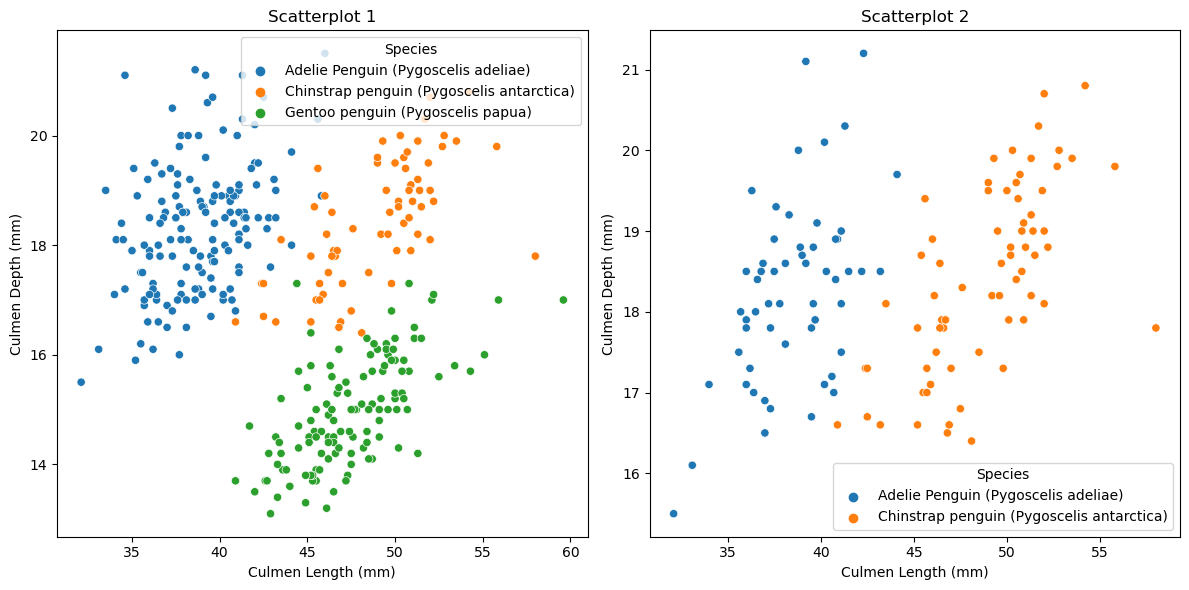

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/palmer-penguins.csv"
df = pd.read_csv(url)

SumTable = df.groupby(['Species', 'Sex']).aggregate({'Body Mass (g)': 'mean'})
SumTable2 = df.groupby(['Species', 'Island']).aggregate({'Culmen Length (mm)': 'mean'})

# Filter to get penguins living on Dream Island
Island_Dream_df = df[df['Island'] == 'Dream']

print(SumTable, SumTable2)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot first scatterplot
sns.scatterplot(data=df, x='Culmen Length (mm)', y='Culmen Depth (mm)', hue= 'Species', ax=axes[0])
axes[0].set_title('Scatterplot 1')

# Plot second scatterplot
sns.scatterplot(x='Culmen Length (mm)', y='Culmen Depth (mm)', data= Island_Dream_df, hue= 'Species', ax=axes[1])
axes[1].set_title('Scatterplot 2')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# FEATURE SELECTION: 

In [4]:
from itertools import combinations
import numpy as np

# Alternative tools to select features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Types of models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Optimizing max_depth
from sklearn.model_selection import GridSearchCV

# Cross validation
from sklearn.model_selection import cross_val_score

# Qualitative and quantitative columns I've selected
all_qual_columns = ["Island_Biscoe", "Island_Dream", "Island_Torgersen", "Stage_Adult, 1 Egg Stage","Clutch Completion_No", "Clutch Completion_Yes", "Sex_FEMALE", "Sex_MALE" ]
all_quant_columns = ["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)"]

LR = LogisticRegression(max_iter = 1000)  

clf = DecisionTreeClassifier(random_state=0)
parameters = {'max_depth': np.arange(1, 21)}

all_cols = []

for qual in all_qual_columns: 
    qual_cols = [col for col in X_train.columns if qual in col] 
    for pair in combinations(all_quant_columns, 2):
        cols =  list(pair) + qual_cols 

        # Linear Regression Model

        LR.fit(X_train[cols], y_train)
        LR_accuracy = LR.score(X_train[cols], y_train)
        cv_scores_LR = cross_val_score(LR, X_train[cols], y_train, cv = 5)

        # Decision Tree Classifier Model

        grid_search = GridSearchCV(clf, parameters, cv = 5)
        grid_search.fit(X_train[cols], y_train)
        best_clf = grid_search.best_estimator_
        best_params = grid_search.best_params_
        dt_accuracy = best_clf.score(X_train[cols], y_train)
        cv_scores_DecisionTree = cross_val_score(best_clf, X_train[cols], y_train, cv = 5)
        
        if (dt_accuracy == 1.0):
            print(f"Features: {cols}, LR Accuracy: {LR_accuracy}, DT Accuracy: {dt_accuracy}, Best Params: {best_params}")
        


Features: ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Island_Dream'], LR Accuracy: 0.99609375, DT Accuracy: 1.0, Best Params: {'max_depth': 5}
Features: ['Body Mass (g)', 'Delta 13 C (o/oo)', 'Island_Dream'], LR Accuracy: 0.82421875, DT Accuracy: 1.0, Best Params: {'max_depth': 8}
Features: ['Culmen Length (mm)', 'Body Mass (g)', 'Sex_FEMALE'], LR Accuracy: 0.97265625, DT Accuracy: 1.0, Best Params: {'max_depth': 7}
Features: ['Culmen Length (mm)', 'Body Mass (g)', 'Sex_MALE'], LR Accuracy: 0.97265625, DT Accuracy: 1.0, Best Params: {'max_depth': 7}


# TESTING

In [5]:
test_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/test.csv"
test = pd.read_csv(test_url)
test_clf = DecisionTreeClassifier(random_state=0, max_depth= 7)
X_test, y_test = prepare_data(test)   


test_cols = ['Culmen Length (mm)', 'Body Mass (g)', 'Sex_MALE', 'Sex_FEMALE']


test_clf = test_clf.fit(X_test[test_cols], y_test)


Test_score = test_clf.score(X_test[test_cols], y_test)


In [6]:
X_test[test_cols]

,Culmen Length (mm),Body Mass (g),Sex_MALE,Sex_FEMALE
0,41.7,4700.0,0.0,1.0
1,50.7,4050.0,1.0,0.0
2,38.1,3425.0,0.0,1.0
3,39.6,3550.0,0.0,1.0
4,43.3,4400.0,0.0,1.0
...,...,...,...,...
64,42.5,3350.0,0.0,1.0
65,54.3,5650.0,1.0,0.0
66,59.6,6050.0,1.0,0.0
67,36.9,3500.0,0.0,1.0


# PLOTTING DECISION REGIONS

In [7]:
from matplotlib.patches import Patch

def plot_regions(model, X, y):
    
    x0 = X[X.columns[0]]
    x1 = X[X.columns[1]]
    qual_features = X.columns[2:]
    
    fig, axarr = plt.subplots(1, len(qual_features), figsize = (7, 3))

    # create a grid
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    
    XX = xx.ravel()
    YY = yy.ravel()

    for i in range(len(qual_features)):
      XY = pd.DataFrame({
          X.columns[0] : XX,
          X.columns[1] : YY
      })

      for j in qual_features:
        XY[j] = 0

      XY[qual_features[i]] = 1

      p = model.predict(XY)
      p = p.reshape(xx.shape)
      
      
      # use contour plot to visualize the predictions
      axarr[i].contourf(xx, yy, p, cmap = "jet", alpha = 0.2, vmin = 0, vmax = 2)
      
      ix = X[qual_features[i]] == 1
      # plot the data
      axarr[i].scatter(x0[ix], x1[ix], c = y[ix], cmap = "jet", vmin = 0, vmax = 2)
      
      axarr[i].set(xlabel = X.columns[0], 
            ylabel  = X.columns[1], 
            title = qual_features[i])
      
      patches = []
      for color, spec in zip(["red", "green", "blue"], ["Adelie", "Chinstrap", "Gentoo"]):
        patches.append(Patch(color = color, label = spec))

      plt.legend(title = "Species", handles = patches, loc = "best")
      
      plt.tight_layout()

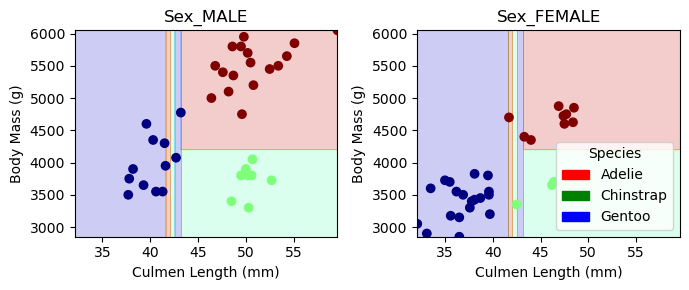

In [8]:
plot_regions(test_clf, X_test[test_cols], y_test)


# CONFUSION MATRIX

In [9]:
from sklearn.metrics import confusion_matrix

y_test_pred = test_clf.predict(X_test[test_cols])
C = confusion_matrix(y_test, y_test_pred)
C

array([[31,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 26]])

# DISCUSSION